In [1]:
import sys

sys.path.append('..')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

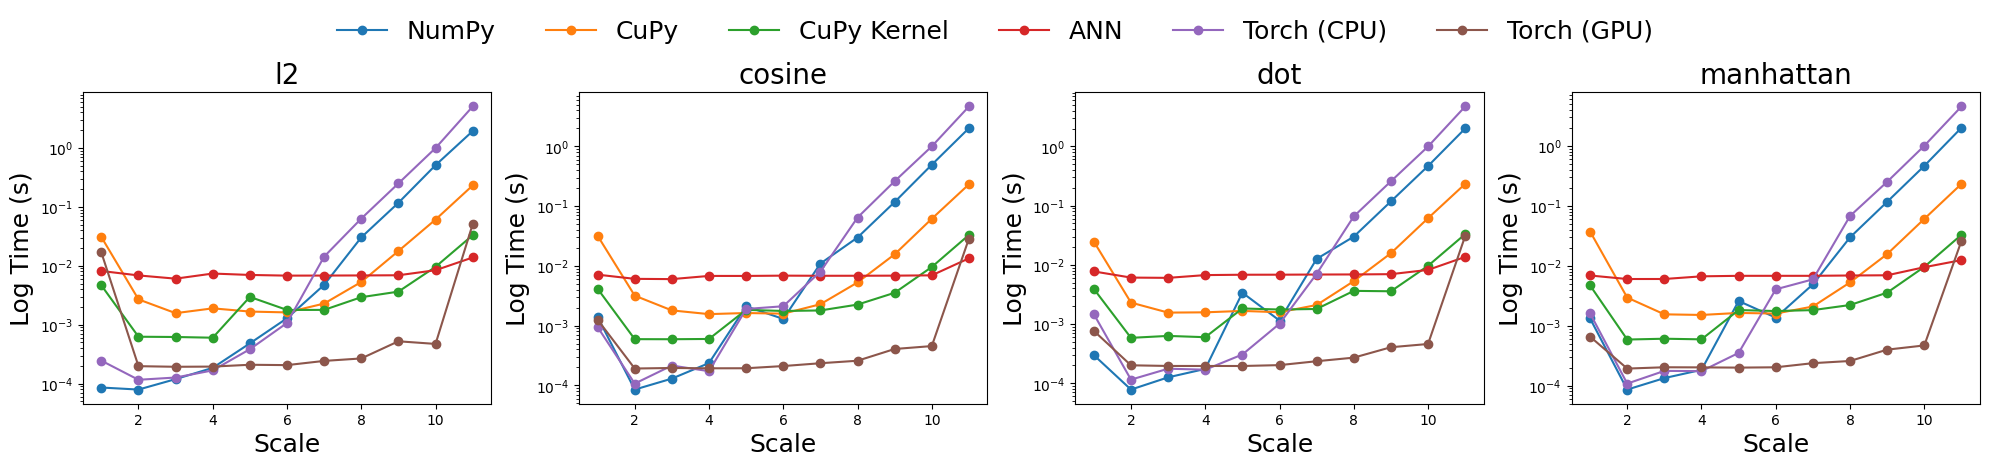

In [ ]:
data = {k: pd.read_csv(f'../results_{k}.csv') for k in ['l2', 'cosine', 'dot', 'manhattan']}

# Create a figure and axes for a 1x4 grid of plots
fig, axarr = plt.subplots(1, 4, figsize=(20, 5))

# Plot data in each subplot
for ax, (k, v) in zip(axarr, data.items()):
  ax.plot(v['i'], v['numpy'], label='NumPy', marker='o')
  ax.plot(v['i'], v['cupy'], label='CuPy', marker='o')
  ax.plot(v['i'], v['kernel'], label='CuPy Kernel', marker='o')
  ax.plot(v['i'], v['ann'], label='ANN', marker='o')
  ax.plot(v['i'], v['torch_cpu'], label='Torch (CPU)', marker='o')
  ax.plot(v['i'], v['torch_gpu'], label='Torch (GPU)', marker='o')

  ax.set_yscale('log')
  ax.set_title(k, fontsize=20)
  ax.set_xlabel('Size (i)', fontsize=18)
  ax.set_ylabel('Log Time (s)', fontsize=18)

# Extract shared legend handles
handles, labels = axarr[0].get_legend_handles_labels()

# Add legend above subplots, below the title, with more vertical space
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.95), ncol=len(labels), frameon=False, prop={'size': 18})

# Adjust layout to leave extra room for the legend and title
plt.tight_layout(rect=[0, 0, 1, 0.85])
plt.show()

In [6]:
# average recall_rate for each data
for k, v in data.items():
  print(f'{k} average recall_rate: {v["recall_rate"].mean()}')

l2 average recall_rate: 0.45999999999999996
cosine average recall_rate: 0.43888888888888883
dot average recall_rate: 0.45999999999999996
manhattan average recall_rate: 0.45999999999999996
